In [1]:
# thesis or cyrille's paper?
# THESIS = True
THESIS = False
fancyblue = (104/255, 171/255, 219/255)
fancyred = (254/255, 110/255, 99/255)
fancypurple = (211/255, 121/255, 251/255)

In [2]:
import colorsys
import matplotlib.ticker as ticker
# Define the RGB colors
fancyblue = (104/255, 171/255, 219/255)
fancyred = (254/255, 110/255, 99/255)
fancypurple = (211/255, 121/255, 251/255)

# Convert RGB to HSV
fancyblue_hsv = colorsys.rgb_to_hsv(*fancyblue)
fancyred_hsv = colorsys.rgb_to_hsv(*fancyred)
fancypurple_hsv = colorsys.rgb_to_hsv(*fancypurple)

# Average the saturation and value
average_saturation = (fancyblue_hsv[1] + fancyred_hsv[1] + fancypurple_hsv[1]) / 3
average_value = (fancyblue_hsv[2] + fancyred_hsv[2] + fancypurple_hsv[2]) / 3

average_saturation /= 1.2
average_value = 1

# Create new colors by changing the hue
# For fancyorange, use a hue around 30 degrees (1/12 of the circle)
# For fancygreen, use a hue around 120 degrees (1/3 of the circle)
fancyorange_hue = 30 / 360
fancygreen_hue = 120 / 360

fancyorange_hsv = (fancyorange_hue, average_saturation, average_value)
fancygreen_hsv = (fancygreen_hue, average_saturation, average_value)

# Convert the new HSV colors back to RGB
fancyorange = colorsys.hsv_to_rgb(*fancyorange_hsv)
fancygreen = colorsys.hsv_to_rgb(*fancygreen_hsv)

# Make orange a bit brighter
# fancyorange = (1, fancyorange[1] * 1.15, fancyorange[2] * 1.15)

# Print the results
print("Fancy Orange RGB:", fancyorange)
print("Fancy Green RGB:", fancygreen)

# show the colors
import matplotlib.pyplot as plt
import numpy as np

# fig, ax = plt.subplots()
# ax.plot(np.random.rand(10), color=fancyblue)
# ax.plot(np.random.rand(10), color=fancyred)
# ax.plot(np.random.rand(10), color=fancypurple)
# ax.plot(np.random.rand(10), color=fancyorange)
# ax.plot(np.random.rand(10), color=fancygreen)
# plt.show()
print(average_saturation, average_value)

Fancy Orange RGB: (1, 0.7703779635310872, 0.5407559270621743)
Fancy Green RGB: (0.5407559270621743, 1, 0.5407559270621743)
0.45924407293782565 1


In [3]:
# fancygreen = (0/255, 200/255, 140/255)
# fancyorange = (255/255, 180/255, 0/255)
fancygray = (180/255, 180/255, 180/255)

fancycolors = [fancypurple, fancyorange, fancyred]

In [4]:
# font size:
fs = 15

# data center power usage efficiency
PUE = 1.1

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Timestamp
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.constrained_layout.use'] = True
plt.tight_layout()

C:\Users\Timothe\AppData\Local\Temp\ipykernel_42136\1211093913.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

In [6]:
df = pd.read_csv('../bitcoinforum/6_merging/monthly_stuff.csv')
df['date'] = pd.to_datetime(df['date'])

In [7]:
seconds_in_block = 600
df['joules_per_coin'] = seconds_in_block * df['hashrate'] / (df['efficiency'] * df['coins_per_block'])
joules_per_coin = df[['date', 'joules_per_coin']]
df['joules_per_dollar'] = df['joules_per_coin'] / df['price']
df.set_index('date', inplace=True)
joules_per_dollar = df[['joules_per_dollar']]
joules_per_coin.index = joules_per_coin['date']
joules_per_coin = joules_per_coin.drop(columns=['date'])

In [8]:
joules_per_coin.to_csv('../excel_sheet/joules_per_coin.csv')

In [9]:
joules_per_second = df['hashrate'] / df['efficiency']
# reverse order
joules_per_second = joules_per_second.iloc[::-1]

In [10]:
price = df['price']
log_price = np.log10(df['price'])
# log_price = df['price']
log_price = log_price.iloc[::-1]

In [11]:
# func = np.log10
func = lambda x: x

In [12]:
colors = ['blue', 'blue']
if THESIS:
    electricity_costs = np.array([0.03, 0.07]) * PUE / (1000*3600)
    aux_costs = np.array([1, 2.0])
    names = ['m_min(t)', 'm_max(t)']
    names2 = ['m_min(t)', 'm_max(t)']
else:
    electricity_costs = np.array([0.03, 0.05, 0.07]) / (1000*3600)
    aux_costs = np.array([1, 1.1, 1.2])
    names = ['m_min(t)', 'm_middle(t)', 'm_max(t)']
    names2 = ['C = 0.03 USD/kWh; PUE = 1.0', 'C = 0.05 USD/kWh; PUE = 1.1', 'C = 0.07 USD/kWh; PUE = 1.2']
    colors.append('blue')

In [13]:
# Left plot stuff:
# func = np.log10
func = lambda x: x

# Calculate cost per coin for each combination
cost_per_coin = [func(joules_per_coin * e * a) for (e, a) in zip(electricity_costs, aux_costs)]
cost_per_coin = [x.rename(columns={'joules_per_coin': names[i]}) for i, x in enumerate(cost_per_coin)]
cost_per_coin = pd.concat(cost_per_coin, axis=1)
cost_per_coin = cost_per_coin.iloc[::-1]




# Right plot stuff:
# Convert index to datetime
joules_per_second.index = pd.to_datetime(joules_per_second.index)

# Resample to daily frequency and interpolate
daily_joules_per_second = joules_per_second.resample('D').interpolate(limit_direction='both')

# Convert joules per second to TWH
twh_per_day = daily_joules_per_second * 24 * 1e-12

# Apply PUE
twh_per_day = twh_per_day * PUE

# Calculate cumulative TWH
cumulative_twh = twh_per_day.cumsum()





In [14]:
pd.set_option('display.max_rows', 10)

In [15]:
intensity_file = "carbonintensity.html"
# read the html file using the first row as header
dfs = pd.read_html(intensity_file, header=0)

# Access the second table (index 1)
df = dfs[0]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Display the DataFrame
df.head(1) # Date	China (% hashrate)	China emission intensity (in gCO2e/kwh)	Rest (% hashrate)	Rest of the world emission intensity (in gCO2e/kwh)	World emission intensity (in gCO2e/kwh)

C:\Users\Timothe\AppData\Local\Temp\ipykernel_42136\670972159.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


China (% hashrate)  China emission intensity (in gCO2e/kwh)  \
Date                                                                      
2010-07-01                66.9                                   349.82   

            Rest (% hashrate)  \
Date                            
2010-07-01               33.1   

            Rest of the world emission intensity (in gCO2e/kwh)  \
Date                                                              
2010-07-01                                             554.12     

            World emission intensity (in gCO2e/kwh)  
Date                                                 
2010-07-01                                   417.53

In [16]:
average_values = df.groupby(df.index.year).mean()
# for each year, get the average intensity (weighted by hashrate)
average_values['intensity'] = (average_values['China emission intensity (in gCO2e/kwh)'] * average_values['China (% hashrate)'] + average_values['Rest of the world emission intensity (in gCO2e/kwh)'] * average_values['Rest (% hashrate)']) / 100
# the df ends at 2019. forward fill up to 2023
intensity_df = average_values.reindex(range(2011, 2024)).ffill()
intensity_df["intensity"] = intensity_df["intensity"]*1e-3
intensity_df["intensity"]
intensity_df2 = pd.DataFrame(intensity_df["intensity"])
intensity_df2["year"] = intensity_df2.index
intensity_df2.to_csv("carboncomparison/intensity.csv", index=False)
intensity_df2

intensity  year
Date                 
2011   0.517203  2011
2012   0.516045  2012
2013   0.516379  2013
2014   0.514491  2014
2015   0.510113  2015
...         ...   ...
2019   0.515194  2019
2020   0.515194  2020
2021   0.515194  2021
2022   0.515194  2022
2023   0.515194  2023

[13 rows x 2 columns]

In [17]:
# Create table where for each Jan 1st starting with 2012, we have the cumulative and daily TWH
electricity_table = pd.DataFrame(index=pd.date_range(start='2011-01-01', end='2023-01-01', freq='YS'))
electricity_table['daily_twh'] = twh_per_day.resample('YS').last()
electricity_table['yearly_twh'] = twh_per_day.resample('YS').sum()
electricity_table['cumulative_twh'] = cumulative_twh.resample('YS').last()

# # Calculate carbon footprint (0.5 gCO2/Wh = 0.5e-6 TCO2/Wh)
# intensity = 0.5e-6  # TCO2/Wh
# electricity_table['daily_carbon'] = electricity_table['daily_twh'] * 1e12 * intensity
# electricity_table['yearly_carbon'] = electricity_table['yearly_twh'] * 1e12 * intensity
# electricity_table['cumulative_carbon'] = electricity_table['cumulative_twh'] * 1e12 * intensity

# Calculate carbon footprint with intensity_df
# Ensure intensity_df has the same index as electricity_table
intensity_df.index = pd.to_datetime(intensity_df.index.astype(str) + '-01-01')
# Merge electricity_table with intensity_df
merged_table = electricity_table.merge(intensity_df[['intensity']], left_index=True, right_index=True, how='left')

# Calculate carbon footprint
multi = 1e6
merged_table['daily_carbon'] = merged_table['daily_twh'] * merged_table['intensity'] * multi
merged_table['yearly_carbon'] = merged_table['yearly_twh'] * merged_table['intensity'] * multi
merged_table['cumulative_carbon'] = merged_table['cumulative_twh'] * merged_table['intensity'] * multi


electricity_table = merged_table.drop(columns=['intensity'])
electricity_table["intensity"] = merged_table["intensity"]


electricity_table = electricity_table.T
electricity_table.columns = electricity_table.columns.year  # Use only the year for column names
electricity_table.index = ['Daily TWH', 'Yearly TWH', 'Cumulative TWH', 'Daily Carbon (TCO2)', 'Yearly Carbon (TCO2)', 'Cumulative Carbon (TCO2)', 'Intensity (gCO2/Wh)']

# Add a row to separate electricity consumption from carbon footprint
separator = pd.DataFrame([[''] * len(electricity_table.columns)], index=[''], columns=electricity_table.columns)
electricity_table = pd.concat([electricity_table.iloc[:3], separator, electricity_table.iloc[3:]])


electricity_table = electricity_table.T



# Print the table in LaTeX format
print(electricity_table.to_latex(float_format="%.1e", index=True))

\begin{tabular}{lllllllll}
\toprule
 & Daily TWH & Yearly TWH & Cumulative TWH &  & Daily Carbon (TCO2) & Yearly Carbon (TCO2) & Cumulative Carbon (TCO2) & Intensity (gCO2/Wh) \\
\midrule
2011 & 6.8e-05 & 3.2e-02 & 3.2e-02 &  & 3.5e+01 & 1.7e+04 & 1.7e+04 & 5.2e-01 \\
2012 & 2.1e-04 & 3.8e-02 & 7.0e-02 &  & 1.1e+02 & 2.0e+04 & 3.6e+04 & 5.2e-01 \\
2013 & 3.5e-04 & 2.3e-02 & 9.4e-02 &  & 1.8e+02 & 1.2e+04 & 4.8e+04 & 5.2e-01 \\
2014 & 6.1e-03 & 1.3e+00 & 1.4e+00 &  & 3.1e+03 & 6.9e+05 & 7.4e+05 & 5.1e-01 \\
2015 & 8.3e-03 & 2.5e+00 & 3.9e+00 &  & 4.2e+03 & 1.3e+06 & 2.0e+06 & 5.1e-01 \\
2016 & 1.4e-02 & 4.2e+00 & 8.1e+00 &  & 7.0e+03 & 2.1e+06 & 4.1e+06 & 5.1e-01 \\
2017 & 4.4e-02 & 9.3e+00 & 1.7e+01 &  & 2.2e+04 & 4.7e+06 & 8.8e+06 & 5.1e-01 \\
2018 & 1.1e-01 & 3.8e+01 & 5.6e+01 &  & 5.8e+04 & 1.9e+07 & 2.8e+07 & 5.0e-01 \\
2019 & 2.0e-01 & 5.7e+01 & 1.1e+02 &  & 1.0e+05 & 3.0e+07 & 5.8e+07 & 5.2e-01 \\
2020 & 2.6e-01 & 8.2e+01 & 2.0e+02 &  & 1.3e+05 & 4.2e+07 & 1.0e+08 & 5.2e-01 \\
20

In [18]:
electricity_table.to_csv("../excel_sheet/csv/Electricity consumption and carbon footprint.csv")

In [19]:
yearlycarbon = merged_table[['yearly_carbon'] ]
yearlycarbon["year"] = yearlycarbon.index.year
yearlycarbon.rename(columns={"yearly_carbon": "ours"}, inplace=True)
yearlycarbon.to_csv('carboncomparison/01_ours.csv', index=False)
yearlycarbon

C:\Users\Timothe\AppData\Local\Temp\ipykernel_42136\4282599989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearlycarbon["year"] = yearlycarbon.index.year
C:\Users\Timothe\AppData\Local\Temp\ipykernel_42136\4282599989.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearlycarbon.rename(columns={"yearly_carbon": "ours"}, inplace=True)


ours  year
2011-01-01  1.676078e+04  2011
2012-01-01  1.950306e+04  2012
2013-01-01  1.203220e+04  2013
2014-01-01  6.908622e+05  2014
2015-01-01  1.270134e+06  2015
...                  ...   ...
2019-01-01  2.951522e+07  2019
2020-01-01  4.244593e+07  2020
2021-01-01  4.624655e+07  2021
2022-01-01  6.295488e+07  2022
2023-01-01  8.882934e+07  2023

[13 rows x 2 columns]

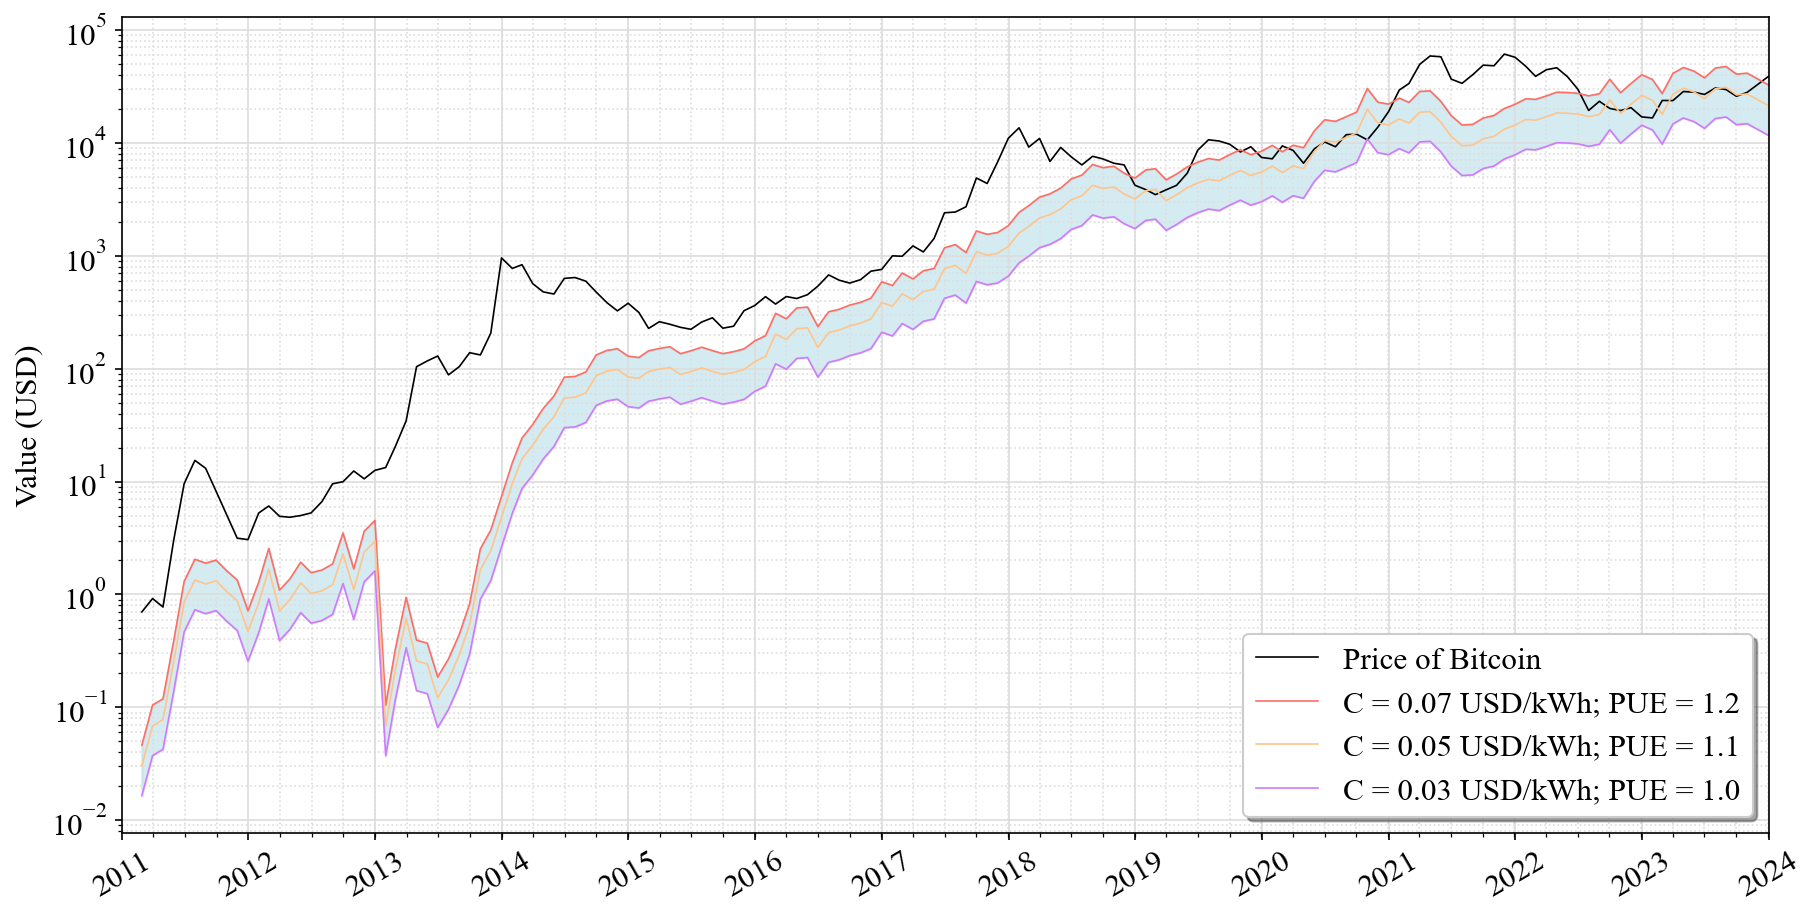

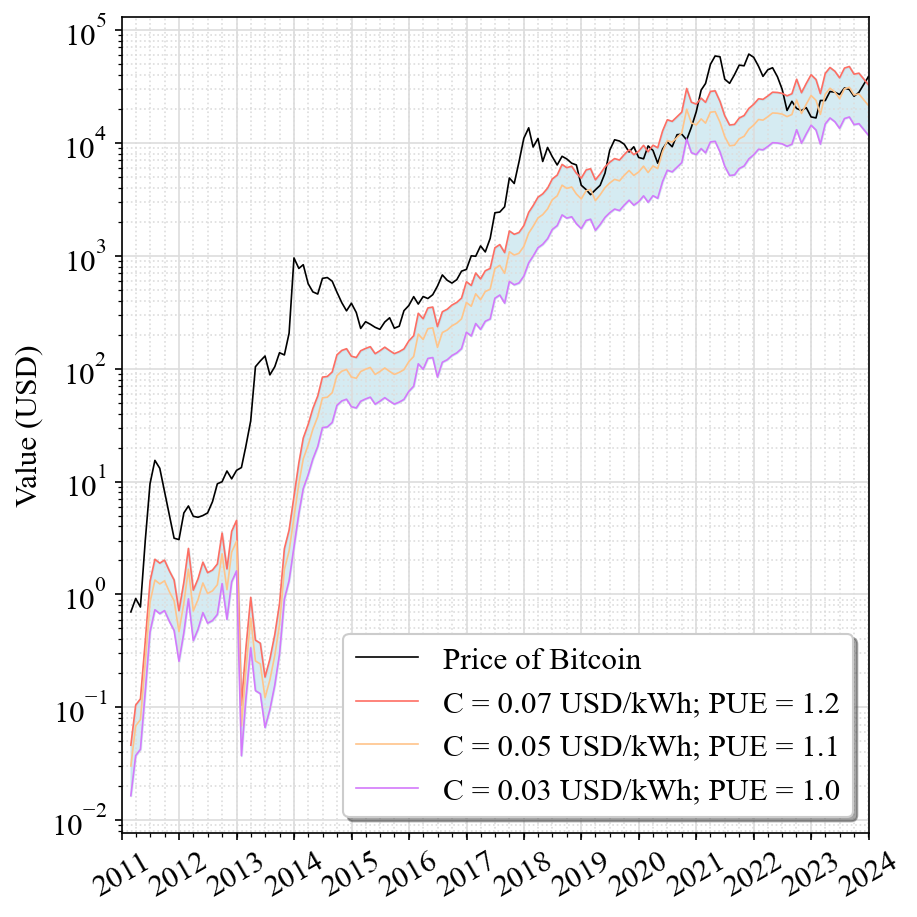

In [20]:

# Define the first plotting function
def plot_cost_per_coin(ax, cost_per_coin, log_price, names, names2, colors):
    # Add more gridlines
    ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
    ax.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=0.8)
    ax.minorticks_on()

    start_date = cost_per_coin.index[0] - pd.DateOffset(months=0)
    end_date = cost_per_coin.index[-1] + pd.DateOffset(months=0)
    ax.set_xlim(start_date, end_date)

    ax.plot(log_price.index, 10**log_price, alpha=1, color='black', linewidth=0.8, label="Price of Bitcoin")

    # Plot each cost per coin with the specified colors and labels using LaTeX for subscript
    # for i, color in enumerate(colors):
    for i in range(3)[::-1]:
        # print(i)
        # c = color
        c = fancycolors[i]
        ax.plot(cost_per_coin.index, cost_per_coin[names[i]], linestyle='-', linewidth=0.8, color=c, label=f'{names2[i]}')


    

    # Fill the area between m_min(t) and m_max(t) (old color was "lightblue")
    ax.fill_between(cost_per_coin.index, cost_per_coin['m_min(t)'], cost_per_coin['m_max(t)'], color="lightblue", alpha=0.5)

    # Set x-ticks to every year and format them to include "01.01."
    years = pd.date_range(start=pd.Timestamp('2010-12-31 00:00:00'), end=('2024-01-01 00:00:00'), freq='YS')
    ax.set_xticks(years)
    ax.set_xticklabels([f"{year.year}" for year in years], rotation=30)

    # Set y-axis label and format y-ticks to display as 10^x
    ax.set_ylabel('Value (USD)', rotation='vertical')

    ax.set_yscale('log')
    # ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'$10^{{{int(np.log10(x))}}}$'))
    ax.set_yscale('log')



    # Add legend with the specified changes
    handles, labels = ax.get_legend_handles_labels()
    labels = labels
    ax.legend(handles, labels, loc='lower right', fancybox=True, shadow=True, fontsize=fs)






plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({'font.size': fs})
plt.rcParams.update({'figure.dpi': 150})
plt.rcParams['figure.facecolor'] = 'white'


fig, ax = plt.subplots(figsize=(12, 6))
plot_cost_per_coin(ax, cost_per_coin, log_price, names, names2, colors)
plt.savefig('pdfs/enveloppe_wide.pdf', format='pdf', bbox_inches='tight')
plt.show()
fig, ax = plt.subplots(figsize=(6, 6))
plot_cost_per_coin(ax, cost_per_coin, log_price, names, names2, colors)
plt.savefig('pdfs/enveloppe_thin.pdf', format='pdf', bbox_inches='tight')
plt.show()



In [21]:
twh_per_day # series: date

date
2011-02-28    0.000004
2011-03-01    0.000005
2011-03-02    0.000005
2011-03-03    0.000005
2011-03-04    0.000005
                ...   
2023-12-27    0.391022
2023-12-28    0.389327
2023-12-29    0.387633
2023-12-30    0.385938
2023-12-31    0.384243
Freq: D, Length: 4690, dtype: float64

In [22]:
intensity_df2 #	Date intensity	year	

intensity  year
Date                 
2011   0.517203  2011
2012   0.516045  2012
2013   0.516379  2013
2014   0.514491  2014
2015   0.510113  2015
...         ...   ...
2019   0.515194  2019
2020   0.515194  2020
2021   0.515194  2021
2022   0.515194  2022
2023   0.515194  2023

[13 rows x 2 columns]

In [23]:
mapping = {}
for row in intensity_df2.itertuples():
    year = row.year
    intensity = row.intensity
    mapping[year] = intensity

In [24]:
co2_per_day = pd.DataFrame(twh_per_day)# * 1e6
for (i,row) in enumerate(co2_per_day.iterrows()):
    year = row[0].year
    co2_per_day.iloc[i] *= mapping[year]

In [25]:
co2_per_day = co2_per_day[0]
co2_per_day

date
2011-02-28    0.000002
2011-03-01    0.000002
2011-03-02    0.000002
2011-03-03    0.000003
2011-03-04    0.000003
                ...   
2023-12-27    0.201452
2023-12-28    0.200579
2023-12-29    0.199706
2023-12-30    0.198833
2023-12-31    0.197960
Freq: D, Name: 0, Length: 4690, dtype: float64

In [26]:
cumulative_co2 = co2_per_day.cumsum()

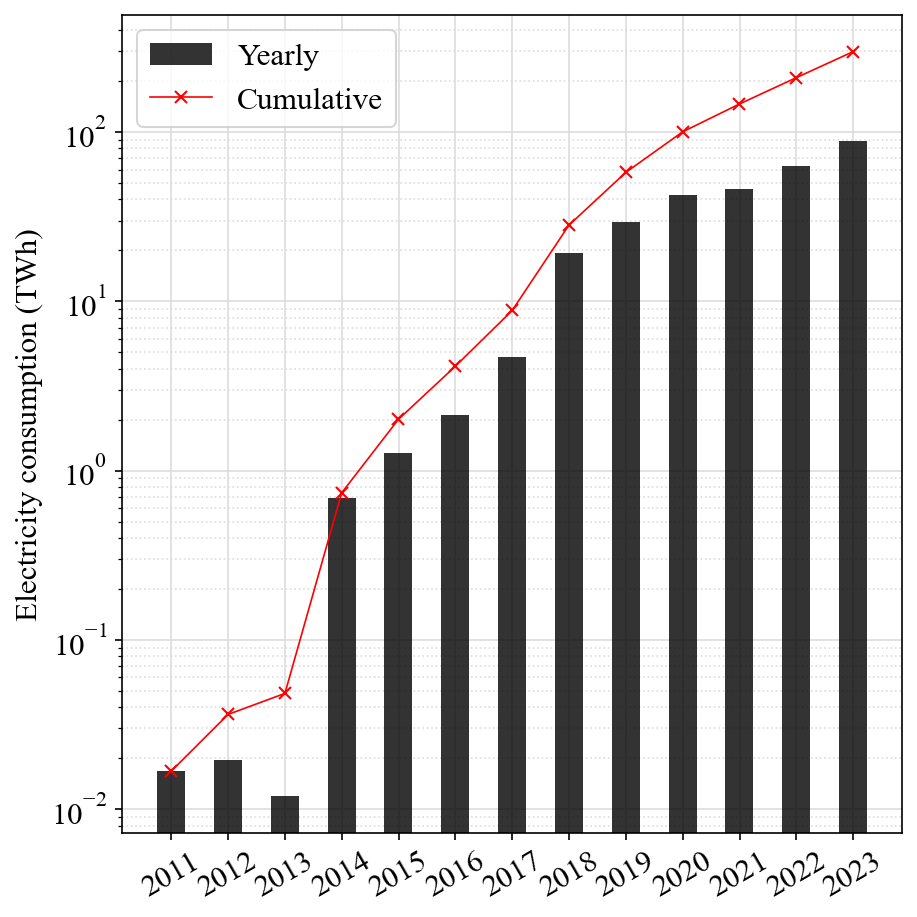

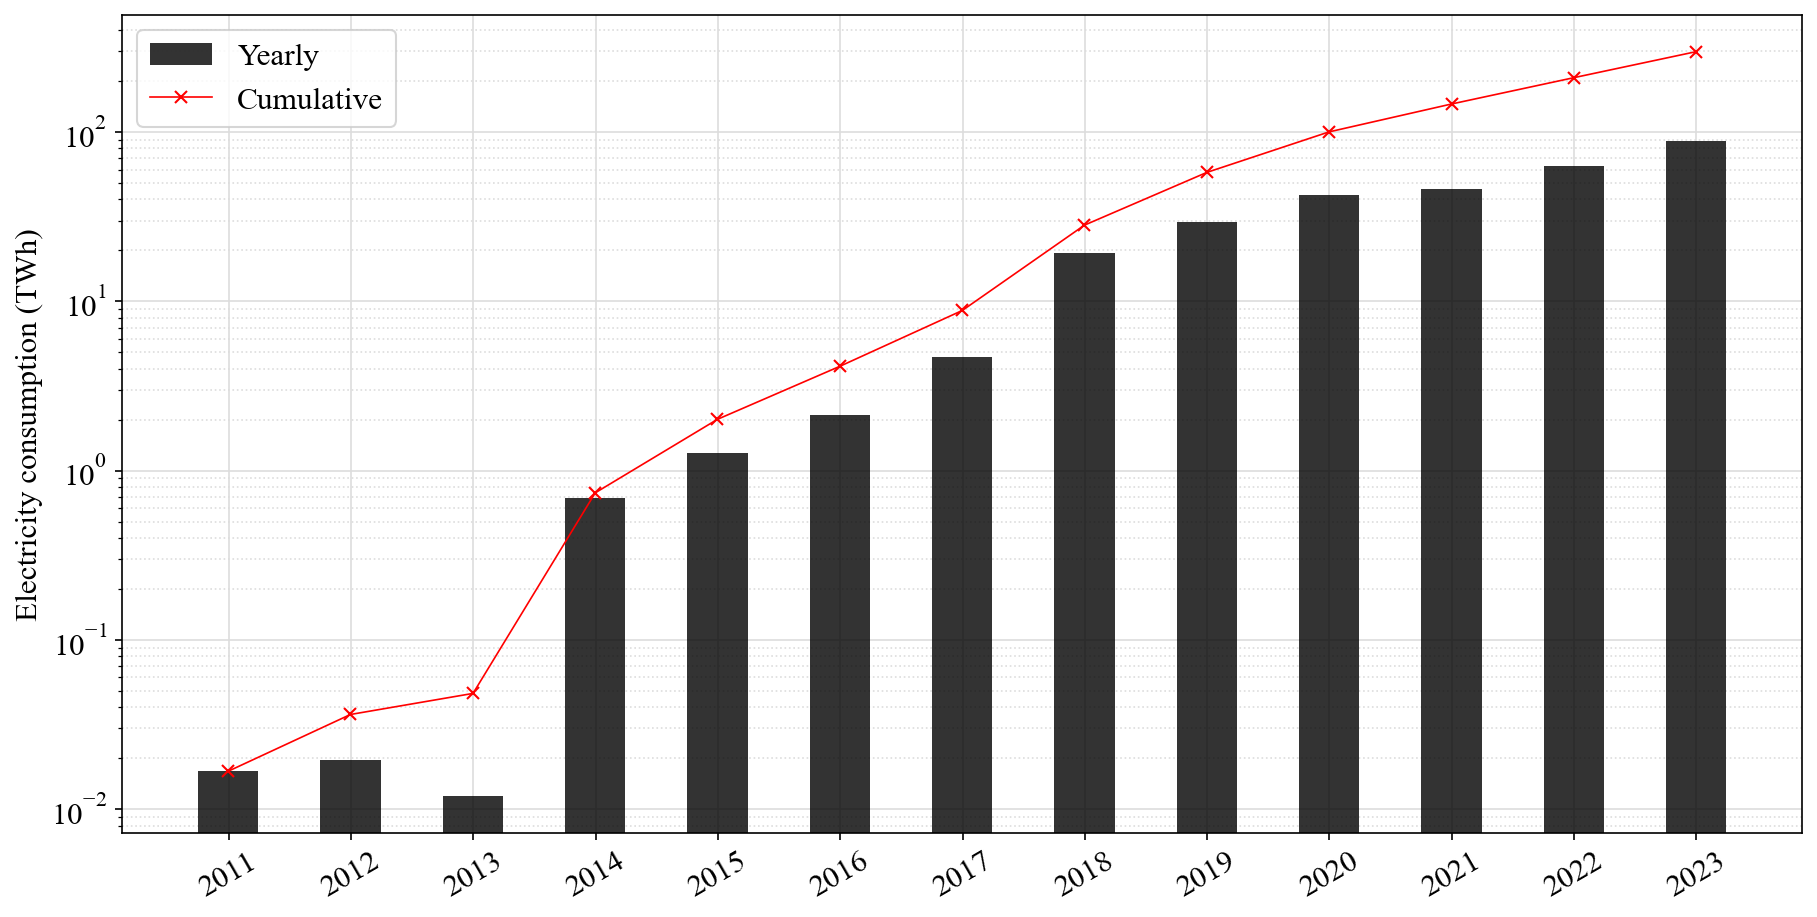

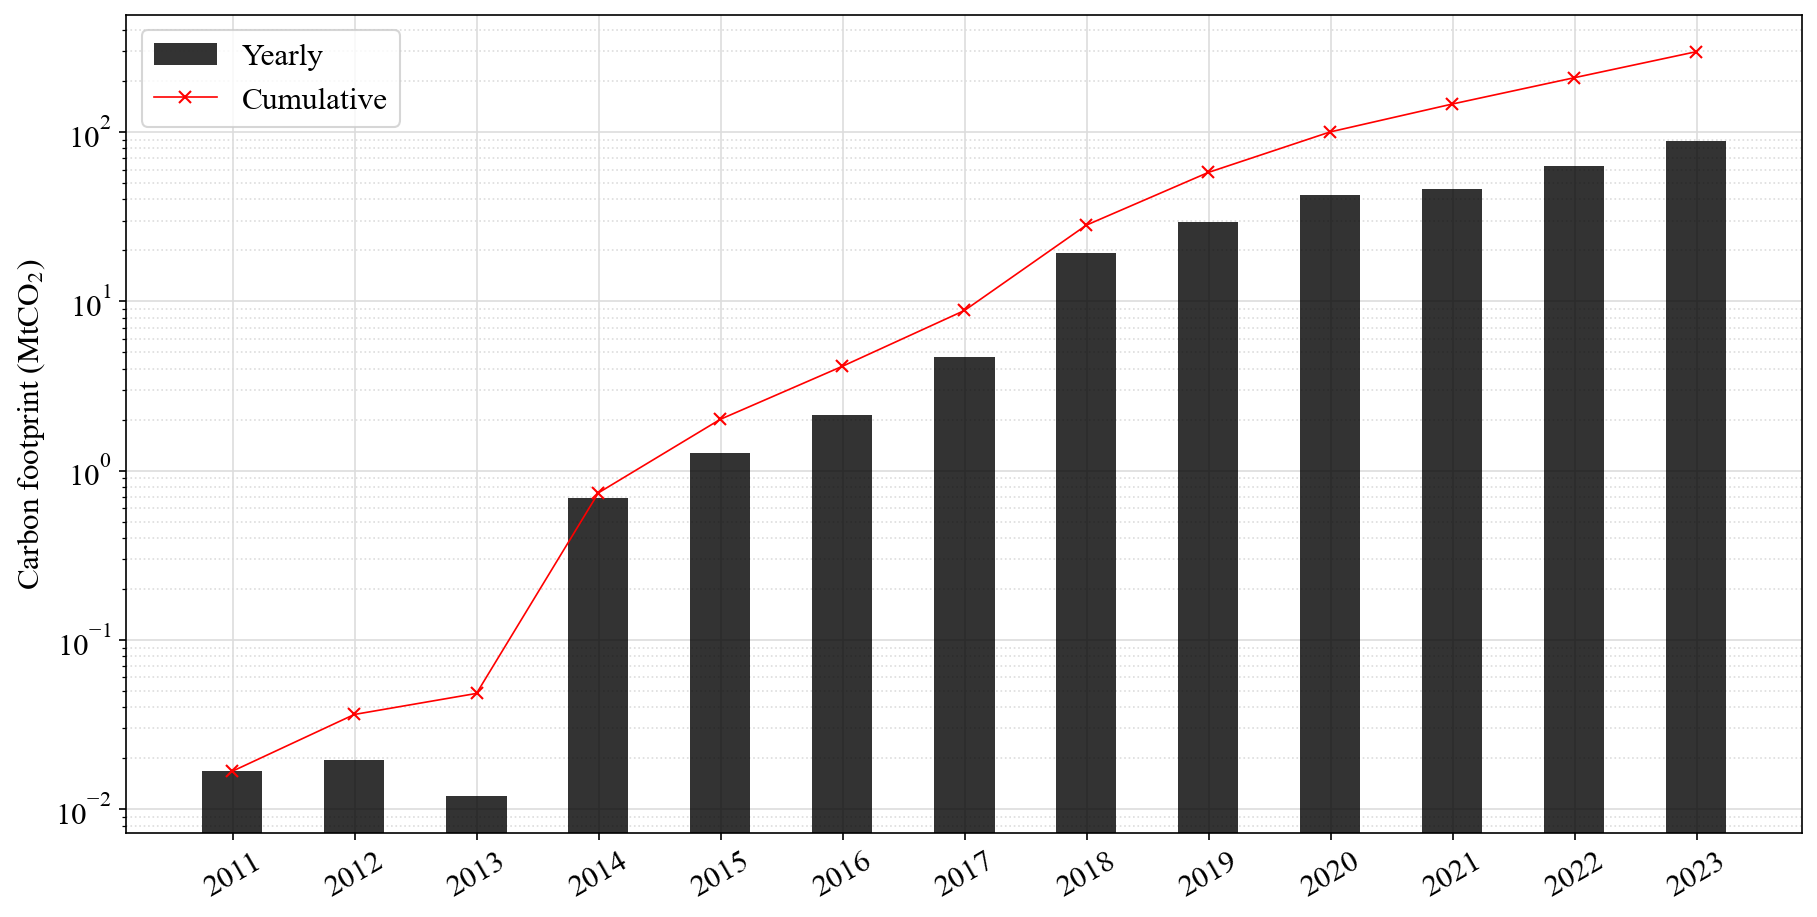

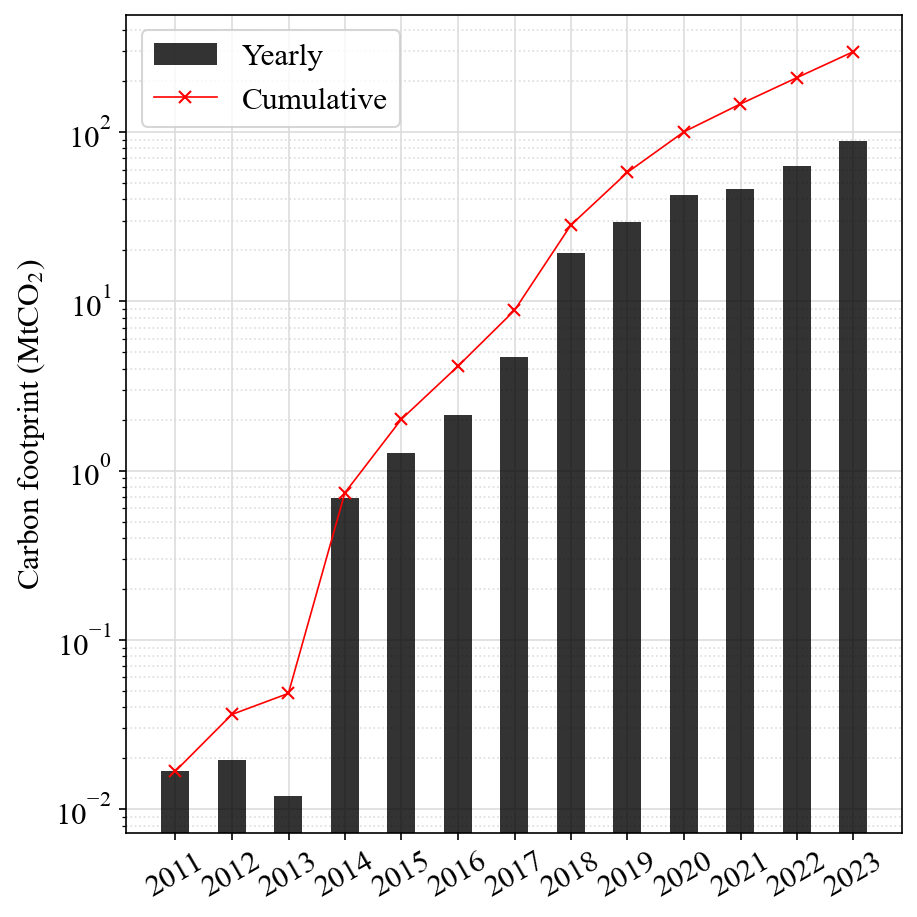

In [27]:
def plot_twh(ax, daily_joules_per_second, twh_per_day, cumulative_twh, co2):
    # Get average twh_per_day on a quarterly basis for smoothing
    quarterly_twh_per_day = twh_per_day.resample('Q').mean()

    # Convert it back to daily
    quarterly_twh_per_day = quarterly_twh_per_day.resample('D').interpolate()
    # Make it end at the same day as the last day of the daily data
    quarterly_twh_per_day = quarterly_twh_per_day[:twh_per_day.index[-1]]
    # Trim cumulative_twh to start at the same day as quarterly_twh_per_day
    start_date = quarterly_twh_per_day.index[0]
    cumulative_twh = cumulative_twh[start_date:]

    # Plot daily TWH (linestyle: dots on solid line, with markers only once per month)
    # ax.plot(quarterly_twh_per_day.index, quarterly_twh_per_day, label='Daily', linestyle='-', marker='o', markevery=90, color=fancyblue, linewidth=0.8)

    # Calculate yearly consumption
    yearly_twh_per_day = twh_per_day.resample('Y').sum()
    # Delay it by -1 years
    yearly_twh_per_day.index = yearly_twh_per_day.index - pd.DateOffset(years=1)

    # Plot yearly consumption as black triangles and connect them with a black line
    # ax.plot(yearly_twh_per_day.index, yearly_twh_per_day, label='Yearly', linestyle='-', marker='^', color='black', linewidth=0.8)
    # Plot yearly consumption as semi-transparent light gray bars
    yearly_plot = ax.bar(yearly_twh_per_day.index, yearly_twh_per_day, 
                         color='black', alpha=0.8, width=180, zorder=3)

    # Plot cumulative TWH 
    cumulative_plot = ax.plot(
        # cumulative_twh.index, cumulative_twh, 
        # cumulative_twh.resample('Y').first().index, cumulative_twh.resample('Y').last(),
        yearly_twh_per_day.cumsum().index, yearly_twh_per_day.cumsum(),
                              linestyle='-', marker='x', markevery=1, 
                              color='red', linewidth=0.8, zorder=4)[0]





    # Set log scale
    ax.set_yscale('log')

    # Set x-axis to show every year but only the year
    years = pd.date_range(start=pd.Timestamp('2010-12-31 00:00:00'), end=daily_joules_per_second.index.max(), freq='YS')
    ax.set_xticks(years)
    ax.set_xticklabels([year.year for year in years], rotation=30)

    # Add more gridlines
    ax.grid(which='major', color='#DDDDDD', linewidth=0.8, zorder=0)
    ax.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=0.8, zorder=0)
    ax.minorticks_on()
    ax.xaxis.set_minor_locator(plt.NullLocator())

    # Add labels
    # ax.set_xlabel('Date')

    if co2:
        ax.set_ylabel('Carbon footprint ($\mathrm{MtCO_2}$)')
    else:
        ax.set_ylabel('Electricity consumption (TWh)')

    # Add legend
    handles = [yearly_plot, cumulative_plot]
    labels = ['Yearly', 'Cumulative']
    ax.legend(handles, labels, fontsize=fs)

plt.rcParams['mathtext.fontset'] = 'stix'


fig, ax = plt.subplots(figsize=(6, 6))
plot_twh(ax, daily_joules_per_second, twh_per_day, cumulative_twh, False)
plt.savefig('pdfs/climate_thin.pdf', format='pdf', bbox_inches='tight')
plt.show()
fig, ax = plt.subplots(figsize=(12, 6))
plot_twh(ax, daily_joules_per_second, twh_per_day, cumulative_twh, False)
plt.savefig('pdfs/climate_wide.pdf', format='pdf', bbox_inches='tight')
plt.show()


fig, ax = plt.subplots(figsize=(12, 6))
plot_twh(ax, daily_joules_per_second, co2_per_day, cumulative_co2, True)
plt.savefig('pdfs/climate_wide_co2.pdf', format='pdf', bbox_inches='tight')
plt.show()
fig, ax = plt.subplots(figsize=(6, 6))
plot_twh(ax, daily_joules_per_second, co2_per_day, cumulative_co2, True)
plt.savefig('pdfs/climate_thin_co2.pdf', format='pdf', bbox_inches='tight')
plt.show()

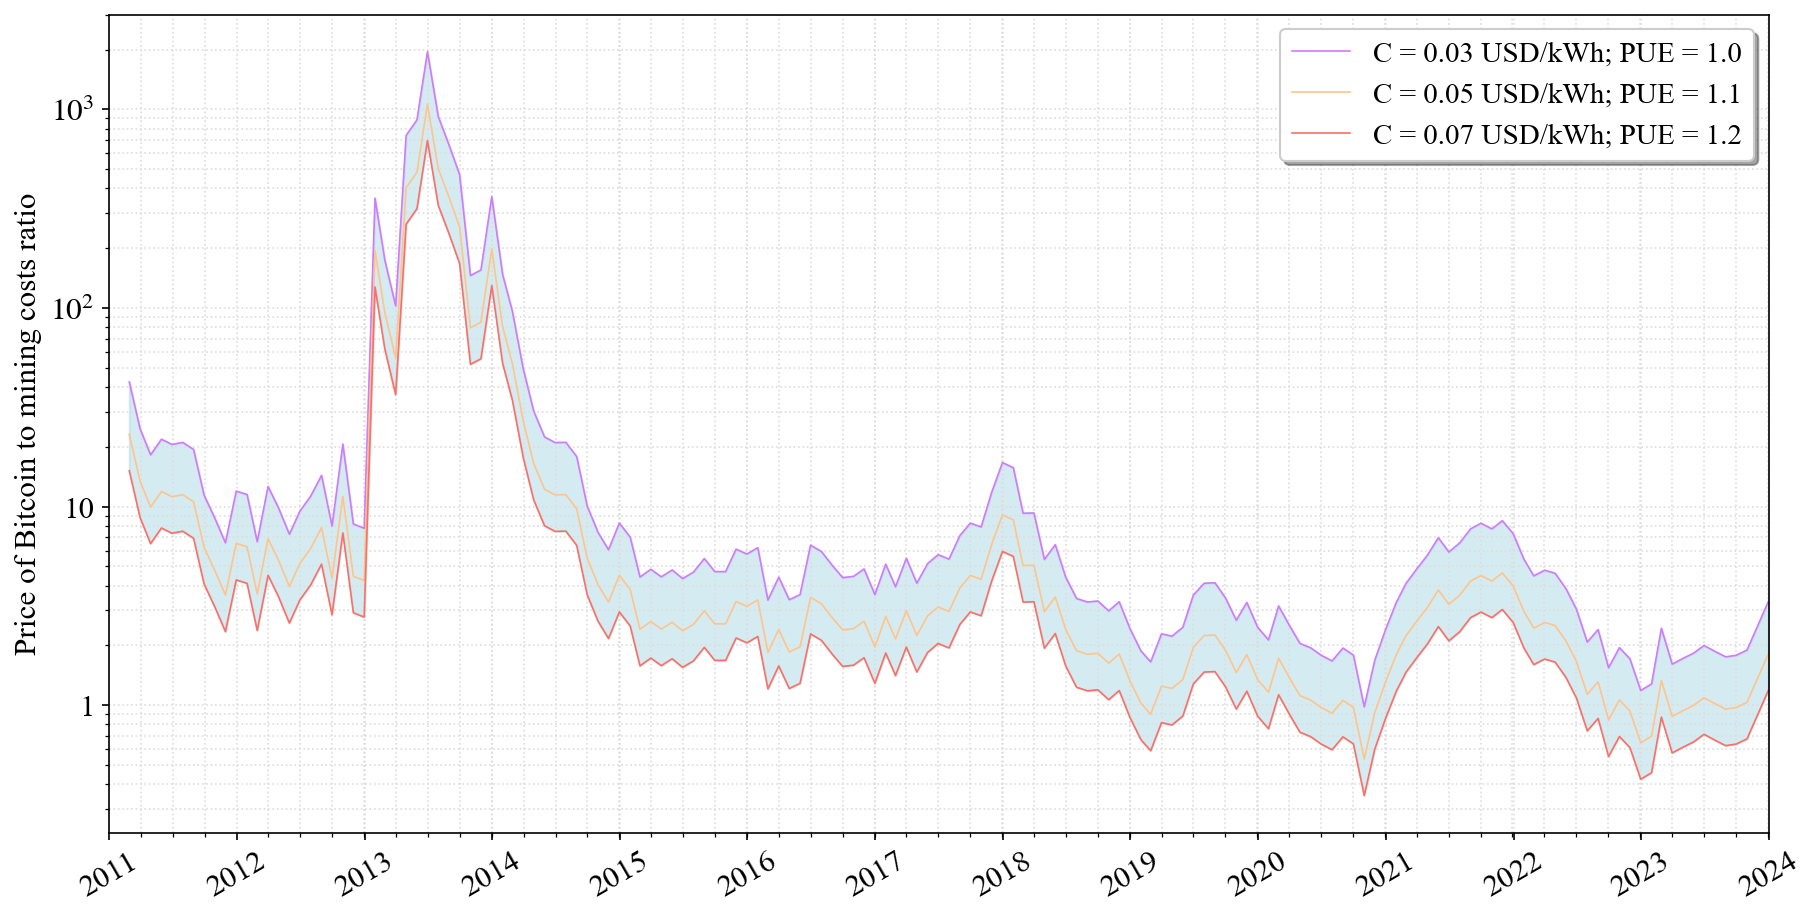

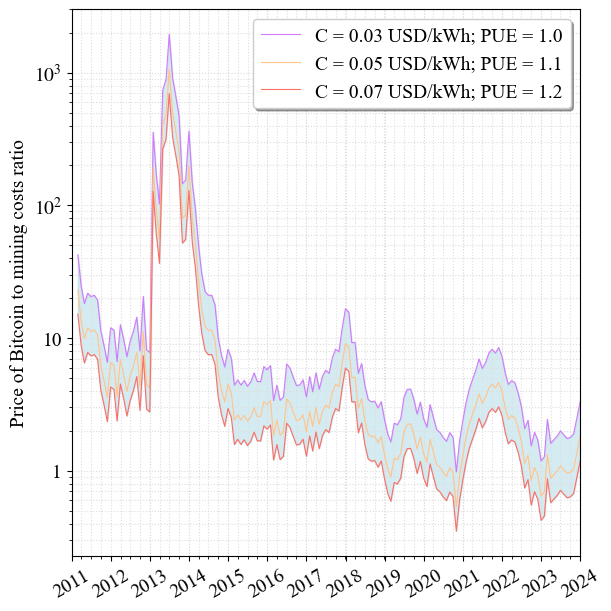

In [28]:
if THESIS:
    pass
else:
    names = ['m_min(t)', 'm_middle(t)', 'm_max(t)']
    # names2 = ['C = 0.03 USD/kWh; PUE = 1.0', 'C = 0.05 USD/kWh; PUE = 1.1', 'C = 0.07 USD/kWh; PUE = 1.2']


# Calculate cost per coin for each combination and log-transform them
cost_per_coin = [np.log10(joules_per_coin * e * a) for (e, a) in zip(electricity_costs, aux_costs)]
cost_per_coin = [x.rename(columns={'joules_per_coin': names[i]}) for i, x in enumerate(cost_per_coin)]
cost_per_coin = pd.concat(cost_per_coin, axis=1)
cost_per_coin = cost_per_coin.iloc[::-1]

# Calculate the price minus each of the cost lines
price_minus_cost = pd.DataFrame(index=cost_per_coin.index)
for name in names:
    price_minus_cost[name] = log_price - cost_per_coin[name]


def plot_profit_per_dollar(ax):
    global colors, names, names2
    ax.minorticks_on()

    start_date = cost_per_coin.index[0] - pd.DateOffset(months=0)
    end_date = cost_per_coin.index[-1] + pd.DateOffset(months=0)
    ax.set_xlim(start_date, end_date)

    # Plot each price minus cost per coin with the specified colors and labels using LaTeX for subscript
    for i, color in enumerate(colors):
        lab = names2[i]
        c = fancycolors[i]
        ax.semilogy(price_minus_cost.index, 10**price_minus_cost[names[i]], linestyle='-', linewidth=0.8, color=c, label=lab)

    # Fill the area between price - m_min(t) and price - m_max(t) with light blue shade
    ax.fill_between(price_minus_cost.index, 10**price_minus_cost['m_min(t)'], 10**price_minus_cost['m_max(t)'], color='lightblue', alpha=0.5)

    # Set x-ticks to every year and format them to include "01.01."
    years = pd.date_range(start=pd.Timestamp('2010-12-31 00:00:00'), end=('2024-01-01 00:00:00'), freq='YS')
    ax.set_xticks(years)
    ax.set_xticklabels([f"{year.year}" for year in years], rotation=30)

    # Set y-axis label
    ax.set_ylabel('Price of Bitcoin to mining costs ratio', rotation='vertical')

    # Set font to Times New Roman
    plt.rcParams['font.family'] = 'Times New Roman'

    # Make the font larger
    fs = 14
    plt.rcParams.update({'font.size': fs})

    # Increase DPI
    plt.rcParams.update({'figure.dpi': 100})

    # Rotate x-ticks
    plt.xticks(rotation=30)

    # Add a grid for log scale
    ax.grid(which='both', color='#DDDDDD', linestyle=':', linewidth=0.8)
    ax.set_yscale('log')

    # Set y-axis ticks
    ax.yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=15))
    ax.yaxis.set_minor_locator(ticker.LogLocator(base=10, subs=np.arange(2, 10) * 0.1, numticks=15))

    # Custom formatter for y-axis labels
    def custom_formatter(y, pos):
        if y == 1:
            return '1'
        elif y == 10:
            return '10'
        elif y >= 100:
            return f'$10^{int(np.log10(y))}$'
        else:
            return f'$10^{np.log10(y):.1f}$'

    ax.yaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))

    ax.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1, fancybox=True, shadow=True)

fig, ax = plt.subplots(figsize=(12, 6))
plot_profit_per_dollar(ax)
plt.savefig('pdfs/profit_wide.pdf', format='pdf', bbox_inches='tight')
plt.show()
fig, ax = plt.subplots(figsize=(6, 6))
plot_profit_per_dollar(ax)
plt.savefig('pdfs/profit_thin.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
import seaborn as sns
from scipy.stats import gaussian_kde
from datetime import datetime, timedelta

plt.rcParams['figure.constrained_layout.use'] = True

In [30]:
# Define the variable name for the unit power efficiency column
unit_power_efficiency = 'TH/J'

data = pd.read_csv('../bitcoinforum/5_processing_extracted_data/hardware_instances_with_efficiency.csv') # date,row_index,hardware_name,TH/J

# Convert the 'date' column to a datetime format
data['date'] = pd.to_datetime(data['date'])

# keep only data from 2011 onwards
data = data[data['date'] >= '2011-01-05']
data

date            hardware_name      TH/J
8     2011-02-19 09:38:19                     5970  0.000002
9     2011-02-22 04:58:02                     6870  0.000002
10    2011-02-24 14:36:52                     5970  0.000002
11    2011-02-27 21:32:08                     5870  0.000002
12    2011-02-28 16:33:47                     5570  0.000002
...                   ...                      ...       ...
14530 2023-12-17 03:45:25  microbt whatsminer m30s  0.026316
14531 2023-12-17 03:45:25  microbt whatsminer m50s  0.038461
14532 2023-12-17 03:45:25  microbt whatsminer m50s  0.038461
14533 2023-12-17 03:45:25  microbt whatsminer m50s  0.038461
14534 2023-12-17 03:45:25  microbt whatsminer m50s  0.038461

[14527 rows x 3 columns]

In [31]:
# Step 1: Average the data points on a quarterly basis
# Ensure that 'TH/J' is a numeric type
data['TH/J'] = pd.to_numeric(data['TH/J'], errors='coerce')

# Create a 'quarter' column by offsetting the 'date' by 15 days and then using to_period
data['quarter'] = (data['date'] - timedelta(days=45)).dt.to_period('Q')
# data['quarter'] = (data['date'] - timedelta(days=0)).dt.to_period('Q')
data

date            hardware_name      TH/J quarter
8     2011-02-19 09:38:19                     5970  0.000002  2011Q1
9     2011-02-22 04:58:02                     6870  0.000002  2011Q1
10    2011-02-24 14:36:52                     5970  0.000002  2011Q1
11    2011-02-27 21:32:08                     5870  0.000002  2011Q1
12    2011-02-28 16:33:47                     5570  0.000002  2011Q1
...                   ...                      ...       ...     ...
14530 2023-12-17 03:45:25  microbt whatsminer m30s  0.026316  2023Q4
14531 2023-12-17 03:45:25  microbt whatsminer m50s  0.038461  2023Q4
14532 2023-12-17 03:45:25  microbt whatsminer m50s  0.038461  2023Q4
14533 2023-12-17 03:45:25  microbt whatsminer m50s  0.038461  2023Q4
14534 2023-12-17 03:45:25  microbt whatsminer m50s  0.038461  2023Q4

[14527 rows x 4 columns]

In [32]:
# Group by 'quarter' and calculate the mean of 'TH/J'
quarterly_data = data.groupby('quarter')['TH/J'].mean().reset_index()

# Convert 'quarter' back to datetime (last day of the quarter)
quarterly_data['quarter'] = quarterly_data['quarter'].dt.to_timestamp(freq='Q')
# # Convert 'quarter' back to datetime (first day of the quarter)
# quarterly_data['quarter'] = quarterly_data['quarter'].dt.to_timestamp()
quarterly_data.head(3)

quarter      TH/J
0 2011-03-31  0.000002
1 2011-06-30  0.000002
2 2011-09-30  0.000002

In [33]:
# add a 2011-01-01 row to the quarterly_data and copy the first row to it
# create timestamp for 2011-01-01
ts = pd.Timestamp('2011-01-01')
quarterly_data.loc[-1] = [ts, quarterly_data['TH/J'][0]]
quarterly_data.index = quarterly_data.index + 1
quarterly_data = quarterly_data.sort_index()
quarterly_data

quarter      TH/J
0  2011-01-01  0.000002
1  2011-03-31  0.000002
2  2011-06-30  0.000002
3  2011-09-30  0.000002
4  2011-12-31  0.000002
..        ...       ...
48 2022-12-31  0.016702
49 2023-03-31  0.017630
50 2023-06-30  0.020520
51 2023-09-30  0.021613
52 2023-12-31  0.034413

[53 rows x 2 columns]

In [34]:
dpi = 110


# unit = "TH/J"
unit = "H/J"
# func = "ln"
func = "log10"
def process(x,apply_multiplier=False):
    multi = 1e12 if unit == "H/J" else 1
    if apply_multiplier == False:
        multi = 1
    if func == "ln":
        return np.log(x*multi)
    if func == "log10":
        return np.log10(x*multi)

In [35]:
process(data[unit_power_efficiency])

8       -5.697821
9       -5.762859
10      -5.697821
11      -5.719877
12      -5.757061
           ...   
14530   -1.579784
14531   -1.414979
14532   -1.414979
14533   -1.414979
14534   -1.414979
Name: TH/J, Length: 14527, dtype: float64

In [36]:
gray_scatter_x = data['date'] # looks like 2011-02-19 09:38:19
gray_scatter_y = process(data[unit_power_efficiency],apply_multiplier=True) # looks like 6.302179

red_scatter_x = quarterly_data['quarter'] # looks like 2011-01-01
red_scatter_y = process(quarterly_data['TH/J'],apply_multiplier=True) # looks like 6.217607 (average of that time period)



# Load the data for the maximum efficiency for all dates
max_efficiency_table = pd.read_csv('../hardwarelist/pmaxv3.csv')
max_efficiency_table['date'] = pd.to_datetime(max_efficiency_table['date'])
max_plot_x = max_efficiency_table['date']
max_plot_y = process(max_efficiency_table['max_efficiency']*1e-12,apply_multiplier=True)

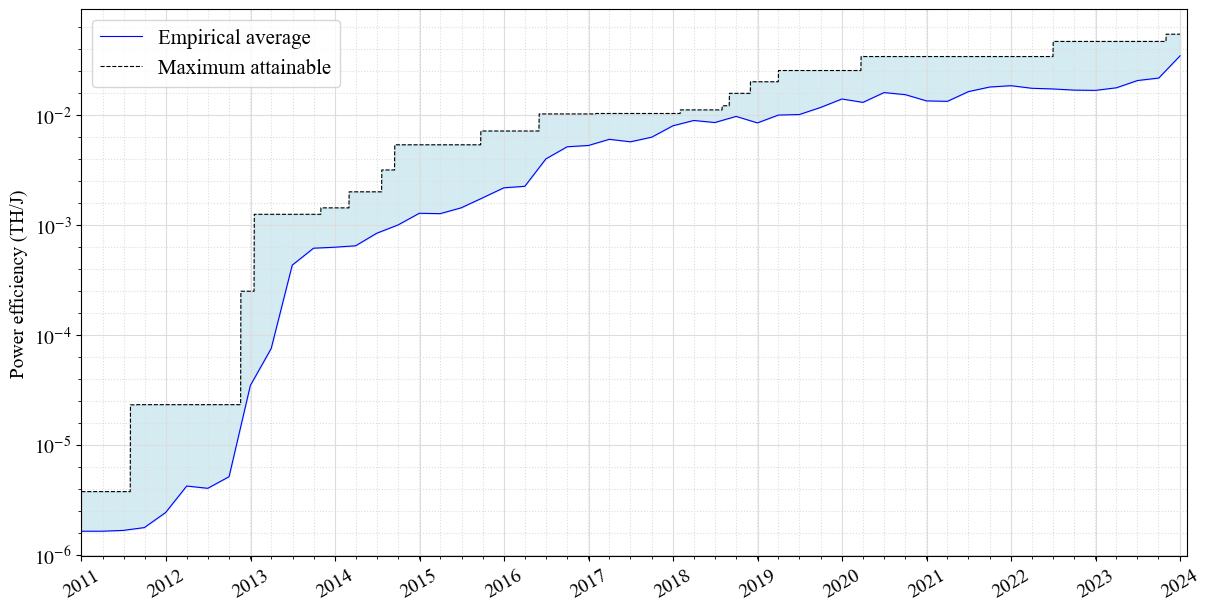

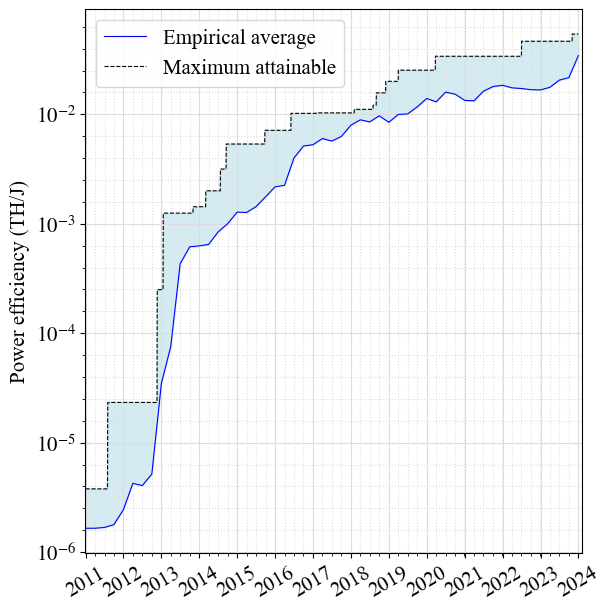

In [37]:

def plot_efficiency_comparison(ax):
    plt.rcParams['figure.facecolor'] = 'white'
    plt.rcParams['mathtext.fontset'] = 'stix'


    # Plot efficiency and max efficiency
    ax.plot(red_scatter_x, red_scatter_y, label='Empirical average', color='blue', linewidth=0.8)
    ax.plot(max_plot_x, max_plot_y, label='Maximum attainable', color='black', linewidth=0.8, linestyle='--')


    # Fill the area, Interpolate red_scatter_y to match the length of max_plot_x
    interp2 = np.interp(max_plot_x, red_scatter_x, red_scatter_y)
    ax.fill_between(max_plot_x, max_plot_y, interp2, interpolate=True, color='lightblue', alpha=0.5)



    # Set x-ticks to every year and format them to include "01.01."
    start = pd.Timestamp('2010-12-31 00:00:00')
    end = pd.Timestamp('2024-01-31 00:00:00')
    years = pd.date_range(start=start, end=end, freq='YS')
    ax.set_xticks(years)
    ax.set_xticklabels([f"{year.year}" for year in years], rotation=30)
    # set xlim
    ax.set_xlim(start, end)

    # Set y-axis label and format y-ticks to display as 10^x
    ax.set_ylabel('Power efficiency (TH/J)', rotation='vertical')
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: "$10^{" + str(x-12).replace(".0","") + "}$")) #.rstrip(".0")

    # Set font to Times New Roman
    plt.rcParams['font.family'] = 'Times New Roman'

    # Make the font larger
    fs = 15
    plt.rcParams.update({'font.size': fs})

    # Increase DPI
    plt.rcParams.update({'figure.dpi': 100})

    # Rotate x-ticks
    plt.xticks(rotation=30)

    # Add a grid
    # Add more gridlines
    ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
    ax.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=0.8)
    ax.minorticks_on()

    # ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(colors) + 2, fancybox=True, shadow=True)
    # ax.legend(loc='upper left', bbox_to_anchor=(0, 0.9), ncol=1, fancybox=True, shadow=True)
    ax.legend()



plt.rcParams['figure.facecolor'] = 'white'
fig, ax = plt.subplots(figsize=(12, 6))
plot_efficiency_comparison(ax)
plt.savefig('pdfs/efficiencycomparison_wide.pdf', format='pdf', bbox_inches='tight')
plt.show()
fig, ax = plt.subplots(figsize=(6, 6))
plot_efficiency_comparison(ax)
plt.savefig('pdfs/efficiencycomparison_thin.pdf', format='pdf', bbox_inches='tight')
plt.show()